In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
%matplotlib inline
from matplotlib import rcParams
rcParams["axes.formatter.useoffset"] = False
rcParams['axes.formatter.limits'] = -15,15
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
#import sys
#sys.path.pop(0)

# Simulating TOI-942b observations with ESPRESSO 

# To get ESPRESSO RV precision, see exposure time calculator here:
- https://www.eso.org/observing/etc/bin/gen/form?INS.NAME=ESPRESSO+INS.MODE=spectro
    
TOI-942 has:
- Teff = 4928
- vsini = 14.3
- vmag = 11.982
- vmacro = 9.8
- Template Spectrum = 'K2V (Pickles)'
- This gives 1.57m/s in the exposure time calculator for a 600s exposure assuming 'K2V (Pickles)'. 

However, **important caveat is that this expected precision assumes a slowly rotating star**, i.e., does not account for the vsini broadening. 
- In this case, the vsini is large (14.2km/s) so this will substantially degrade the RV precision.
- For this example, lets assume that it is 4x worse, or ~6.5m/s. This might be too conservative. 
- Todo is to create a function that accurately calculates this for a given vsini 

In [2]:
import rmfit

/Users/gks/opt/anaconda3/envs/py39/lib/python3.9/site-packages/autograd/numpy/numpy_wrapper.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  int_types = {_np.int, _np.int8, _np.int16, _np.int32, _np.int64, _np.integer}


Transit duration: 4.381909547738694 hours
Number of Points in Transit: 26
Amplitude: 31.399810614322703m/s
SNR: 13.77103485571615
lambda error: 4.160600863579958
###########
TOI-942c_vsini_14.3_ntransits_1.png
###########
Chi2: 343.43604489474353
Chi2 reduced: 7.466000975972685
DOF: 46
Assuming the model is correct, there is 0.000% chance
that this chi2 value or larger could arise by chance
If p value is low, model is ruled out. If p value is high, supports model
Chi2: 46.044018728164566
Chi2 reduced: 1.0009569288731428
DOF: 46
Assuming the model is correct, there is 47.044% chance
that this chi2 value or larger could arise by chance
If p value is low, model is ruled out. If p value is high, supports model
17.245058021548637 13.77103485571615


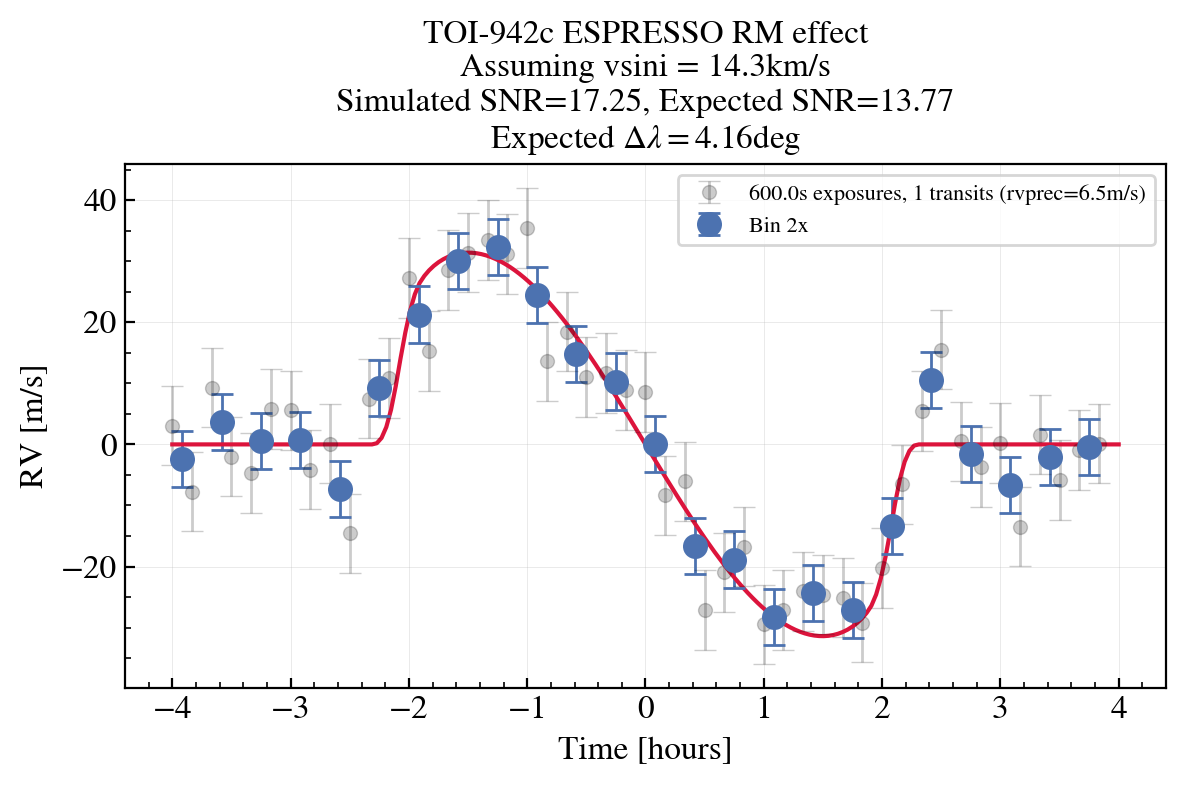

In [3]:
x_obs, rm_obs, errors = rmfit.simulate_rm_curve(P=10.156430,
                                                aRs=17.88,
                                                inc=89.2,
                                                vsini=14.3,
                                                rprs=0.05202,
                                                rvprec=6.5,
                                                exptime=600.,
                                                e=0.,
                                                omega=90.,
                                                vmacro=9.2,
                                                lam=0.,
                                                T0=0.,
                                                u=[0.4,0.3],
                                                ntransits=1,
                                                NBIN=2,
                                                seed=1234,
                                                sim_dur=8,
                                                R=140000,
                                                ax=None,
                                                targetname='TOI-942c',
                                                instrumentname='ESPRESSO')

In [4]:
import rmfit
f = '../data/example/04_toi942c/toi942c_priors.dat'
L = rmfit.rmfit.LPFunction(x_obs, rm_obs, errors,f)
TF = rmfit.rmfit.RMFit(L)
TF.minimize_PyDE(mcmc=False)

Reading in priorfile from ../data/example/04_toi942c/toi942c_priors.dat
   prior       arg1        arg2     label description priortype  fixed
0     NP    0.00000    0.010000     t0_p1       t0_p1     model  False
1     NP   10.15643    0.000079      P_p1        P_p1     model  False
2     UP -180.00000  180.000000    lam_p1      lam_p1     model  False
3     UP    0.00000   30.000000     vsini       vsini     model  False
4     UP   88.00000   90.000000    inc_p1      inc_p1     model  False
5     NP    0.05202    0.001300      p_p1        p_p1     model  False
6     NP   17.88000    0.300000      a_p1        a_p1     model  False
7     NP    0.40000    0.050000        u1          u1     model  False
8     NP    0.30000    0.050000        u2          u2     model  False
9     FP    0.00000    0.000000    ecc_p1      ecc_p1     model   True
10    FP   90.00000   90.000000  omega_p1    omega_p1     model   True
11    NP   10.00000    1.000000     vbeta       vbeta     model  False
12   

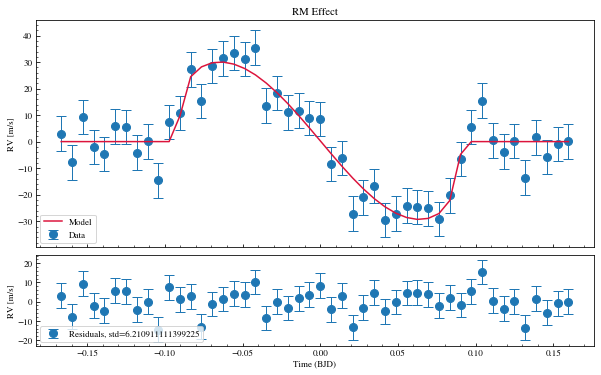

In [5]:
# plot best-fit
TF.plot_fit(TF.min_pv)

In [ ]:
L = rmfit.rmfit.LPFunction(x_obs, rm_obs, errors,f)
TF = rmfit.rmfit.RMFit(L)
TF.minimize_PyDE(mcmc=True,mc_iter=1000)

Reading in priorfile from ../data/example/04_toi942c/toi942c_priors.dat
   prior       arg1        arg2     label description priortype  fixed
0     NP    0.00000    0.010000     t0_p1       t0_p1     model  False
1     NP   10.15643    0.000079      P_p1        P_p1     model  False
2     UP -180.00000  180.000000    lam_p1      lam_p1     model  False
3     UP    0.00000   30.000000     vsini       vsini     model  False
4     UP   88.00000   90.000000    inc_p1      inc_p1     model  False
5     NP    0.05202    0.001300      p_p1        p_p1     model  False
6     NP   17.88000    0.300000      a_p1        a_p1     model  False
7     NP    0.40000    0.050000        u1          u1     model  False
8     NP    0.30000    0.050000        u2          u2     model  False
9     FP    0.00000    0.000000    ecc_p1      ecc_p1     model   True
10    FP   90.00000   90.000000  omega_p1    omega_p1     model   True
11    NP   10.00000    1.000000     vbeta       vbeta     model  False
12   

In [ ]:
# Plot the MCMC fit
TF.plot_mcmc_fit()

In [ ]:
# The min values are recorded in the following attribute
TF.min_pv_mcmc

In [ ]:
rmfit.mcmc_help.plot_chains(TF.sampler.chain,labels=TF.lpf.ps_vary.labels)

In [ ]:
# Make flatchain and posteriors
burnin_index = 200
chains_after_burnin = TF.sampler.chain[:,burnin_index:,:]
flatchain = chains_after_burnin.reshape((-1,len(TF.lpf.ps_vary.priors)))
df_post = pd.DataFrame(flatchain,columns=TF.lpf.ps_vary.labels)
df_post

In [ ]:
# Assess convergence, should be close to 1 (usually within a few percent, if not, then rerun MCMC with more steps)
# This example for example would need a lot more steps, but keeping steps fewer for a quick minimal example
# Usually good to let it run for 10000 - 20000 steps for a 'production run'
rmfit.mcmc_help.gelman_rubin(chains_after_burnin)

In [ ]:
# Plot corner plot
fig = rmfit.mcmc_help.plot_corner(chains_after_burnin,
       show_titles=True,labels=np.array(TF.lpf.ps_vary.descriptions),title_fmt='.1f',xlabcord=(0.5, -0.2))

In [ ]:
# Narrow down on the lambda and vsini
import corner
fig = corner.corner(df_post[['lam_p1','vsini']],show_titles=True,quantiles=[0.18,0.5,0.84])
fig.dpi=100

In [ ]:
# Narrow down on the lambda and vsini
import corner
fig = corner.corner(df_post[['lam_p1','vsini']],show_titles=True,quantiles=[0.18,0.5,0.84])
fig.dpi=100

In [ ]:
# Narrow down on the lambda and vsini
import corner
#fig, ax = plt.subplots(figsize=(4,2),dpi=200)
fig = corner.corner(df_post[['lam_p1']],show_titles=True,quantiles=[0.18,0.5,0.84],title_fmt='.0f')#,fig=fig)
fig.dpi =200
t = fig.axes[0].get_title()
fig.axes[0].set_title('$\lambda$ = {}'.format(t[9:])+'$^\circ$',fontsize=18)
fig.axes[0].tick_params('x',pad=0)
fig.set_figwidth(4)
fig.set_figheight(2)
fig.axes[0].set_xlabel('$\lambda$ [$^\circ$]',fontsize=18,labelpad=-10)
fig.axes[0].set_xlabel('',fontsize=18,labelpad=-10)
fig.axes[0].set_xlim(-30,30)
fig.axes[0].set_xticks([-30,-15,0,15,30])

In [ ]:
# Print median values
df_medvals = TF.get_mean_values_mcmc_posteriors(df_post.values)
df_medvals

In [ ]:
rcParams["savefig.dpi"] = 100
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.weight'] = "normal"
rcParams["axes.formatter.useoffset"] = False
rcParams['xtick.major.width']=1
rcParams['xtick.major.size']=4
rcParams['xtick.minor.width']=1
rcParams['xtick.minor.size']=2
rcParams['ytick.major.width']=1
rcParams['ytick.major.size']=4
rcParams['ytick.minor.width']=1
rcParams['ytick.minor.size']=2
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
rcParams['axes.formatter.limits'] = -10,10


TITLE = 'TOI-942c'
NUMMODELS = 400
shadecolor="black"

###################
times1 = np.linspace(TF.lpf.data['x'][0]-0.02,TF.lpf.data['x'][-1]+0.02,500)
pv_50 = np.percentile(flatchain,[50],axis=0)[0]
t1_mod = np.linspace(times1.min()-0.02,times1.max()+0.02,300)
rv_50 = TF.lpf.compute_total_model(pv_50,t1_mod)

# Plot random samples
fig, ax = plt.subplots(dpi=200)

#################
# Plot data
#################
markercolor="black"
ax.errorbar(TF.lpf.data['x']*24,TF.lpf.data['y'],TF.lpf.data['error'],
            marker='o',elinewidth=0.5,capsize=4,lw=0,mew=0.5,color=markercolor,markersize=3)
ax.plot(t1_mod*24,rv_50,color="crimson",
        label=r'50% Model',lw=2.,zorder=10)
        #label=r'50% Model: $v\sin i=${:0.0f}'.format(pv_50[3])+'km/s',lw=2.,zorder=10)

#################
# Sample models
#################
mmodel1 = []
for i in range(NUMMODELS):
    if i%100 == 0: print("Sampling, i=",i)
    idx = np.random.randint(0, flatchain.shape[0])
    m1 = TF.lpf.compute_total_model(flatchain[idx],times=t1_mod)
    mmodel1.append(m1)
mmodel1 = np.array(mmodel1)
#################
ax.legend(loc='upper right',fontsize=12)
ax.fill_between(t1_mod*24,np.quantile(mmodel1,0.16,axis=0),np.quantile(mmodel1,0.84,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='1$\sigma$',zorder=-1)
ax.fill_between(t1_mod*24,np.quantile(mmodel1,0.02,axis=0),np.quantile(mmodel1,0.98,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='2$\sigma$',zorder=-1)
ax.fill_between(t1_mod*24,np.quantile(mmodel1,0.0015,axis=0),np.quantile(mmodel1,0.9985,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='3$\sigma$',zorder=-1)
#ax.legend(loc='upper right')
ax.set_xlabel('Time from Transit Center [Hours]',labelpad=0,fontsize=14)
ax.set_ylabel('RV [m/s]',labelpad=0,fontsize=14)
#ax.set_title(TITLE)
rmfit.utils.ax_apply_settings(ax,ticksize=12)
#ax.set_ylim(-15,13)
#ax.set_xlim(-4,4)
ax.grid(lw=0)
#ax.set_ylim(-40,40)